<a href="https://colab.research.google.com/github/sinhabhishree/predictive-ai-maintenance/blob/main/predict_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas numpy scikit-learn optuna imbalanced-learn matplotlib

# Import libraries
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Step 1: Load the dataset
from google.colab import files
uploaded = files.upload()  # Allows file upload in Colab
file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Loaded Successfully!")
print(data.head())

# Step 2: Handle Missing Values
print("\nChecking for Missing Values:")
missing_values = data.isnull().sum()
print(missing_values)

# Drop rows with missing values
data = data.dropna()
print("Rows with missing values removed.")

# Step 3: Select Target Column
print("\nColumns in the dataset:", list(data.columns))
target_column = input("Enter the Target Column (e.g., Failure): ")
features = [col for col in data.columns if col != target_column]

# Step 4: Select Features
print("\nAvailable Features:", features)
selected_features = input("Enter Features for Prediction (comma-separated): ").split(',')

# Dynamically assign selected features to user_selected_features
user_selected_features = selected_features  # Save selected features for later use
print(f"\nSelected Features for Prediction: {user_selected_features}")

# Prepare features (X) and target (y)
X = data[user_selected_features]
y = data[target_column]

# Display shapes of X and y
print("Features (X):", X.shape)
print("Target (y):", y.shape)

# Step 5: Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Check scaled data
print("Scaled Data (First 5 Rows):")
print(pd.DataFrame(X_scaled, columns=user_selected_features).head())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Verify the output shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Step 6: Handle Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verify the new shapes of the balanced data
print("Original y_train distribution:", y_train.value_counts())
print("Resampled y_train_res distribution:", pd.Series(y_train_res).value_counts())


Saving processed_data_with_features.csv to processed_data_with_features (1).csv
Dataset Loaded Successfully!
             Timestamp  Temperature (°C)  Vibration (mm/s)  Pressure (Pa)  \
0  2019-01-01 00:00:00          0.176283          0.033611       0.404079   
1  2019-01-01 01:00:00          0.750960          0.302949       1.033265   
2  2019-01-01 02:00:00          0.362631         -0.712681       1.597605   
3  2019-01-01 03:00:00          0.162707         -0.000341       0.058888   
4  2019-01-01 04:00:00         -0.256026         -1.623271      -0.618951   

        RPM  Maintenance Required  Temp_Change  Vib_Change  Temperature_Mean  \
0  0.832177                     1    -0.000021   -0.000016               NaN   
1 -0.719691                     1     0.406404    0.190254               NaN   
2  0.428044                     1    -0.274656   -0.717490               NaN   
3  1.492644                     0    -0.141411    0.503204               NaN   
4  1.035398                 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Saving processed_data_with_features.csv to processed_data_with_features (3).csv

Features (X): (43800, 4)
Target (y): (43800,)

Scaled Data (First 5 Rows):
   Pressure (Pa)       RPM  Temp_Change  Vib_Change
0       0.404079  0.832177    -0.000021   -0.000016
1       1.033265 -0.719691     0.406404    0.190254
2       1.597605  0.428044    -0.274656   -0.717490
3       0.058888  1.492644    -0.141411    0.503204
4      -0.618951  1.035398    -0.296158   -1.146507

X_train shape: (30660, 4)
X_test shape: (13140, 4)
y_train shape: (30660,)
y_test shape: (13140,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Original y_train distribution: Maintenance Required
1    15392
0    15268
Name: count, dtype: int64
Resampled y_train_res distribution: Maintenance Required
0    15392
1    15392
Name: count, dtype: int64

PCA Results (First 5 Rows):
        PC1       PC2
0  0.057764  0.419122
1  0.872721  0.454722
2  1.596563  0.039739
3  1.753788  0.455257
4  0.403458  1.526686


[I 2024-12-20 06:12:21,091] A new study created in memory with name: no-name-2801f236-ea5b-45e8-b9e5-173b6ccc424e
[I 2024-12-20 06:12:32,091] Trial 0 finished with value: 0.5028842013120344 and parameters: {'n_estimators': 98, 'max_depth': 14, 'min_samples_split': 7}. Best is trial 0 with value: 0.5028842013120344.
[I 2024-12-20 06:12:39,466] Trial 1 finished with value: 0.5035405103628208 and parameters: {'n_estimators': 173, 'max_depth': 5, 'min_samples_split': 2}. Best is trial 1 with value: 0.5035405103628208.
[I 2024-12-20 06:12:49,095] Trial 2 finished with value: 0.5050430315774334 and parameters: {'n_estimators': 76, 'max_depth': 16, 'min_samples_split': 3}. Best is trial 2 with value: 0.5050430315774334.
[I 2024-12-20 06:12:59,743] Trial 3 finished with value: 0.5018091184816573 and parameters: {'n_estimators': 173, 'max_depth': 7, 'min_samples_split': 3}. Best is trial 2 with value: 0.5050430315774334.
[I 2024-12-20 06:13:11,699] Trial 4 finished with value: 0.506234762227031


Best Hyperparameters: {'n_estimators': 144, 'max_depth': 13, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      6598
           1       0.51      0.50      0.50      6542

    accuracy                           0.51     13140
   macro avg       0.51      0.51      0.51     13140
weighted avg       0.51      0.51      0.51     13140


Confusion Matrix:
[[3397 3201]
 [3271 3271]]


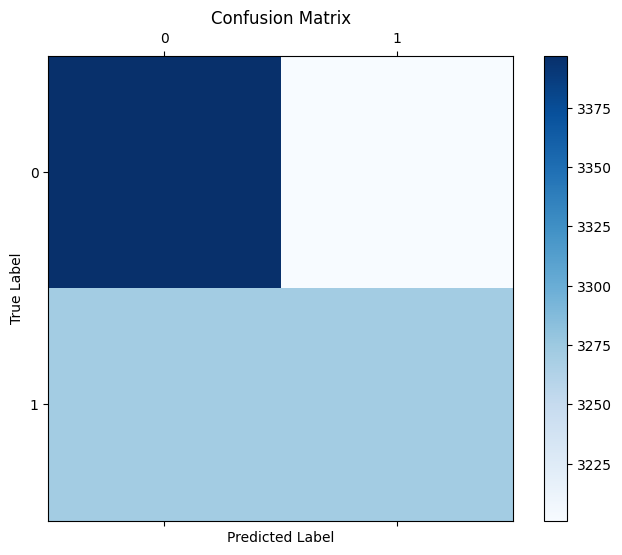

In [4]:
from google.colab import files
uploaded = files.upload()  # Allows file upload in Colab

# Load the processed dataset
file_path = '/content/processed_data_with_features.csv'  # Example path in Google Colab
data = pd.read_csv(file_path)

# Use the dynamically selected features from the first part
target_column = 'Maintenance Required'  # Replace with the actual target column if different
X = data[user_selected_features]  # Dynamically load the user-selected features
y = data[target_column]

# Display shapes of X and y
print("\nFeatures (X):", X.shape)
print("Target (y):", y.shape)

from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Step 5: Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Check scaled data
print("\nScaled Data (First 5 Rows):")
print(pd.DataFrame(X_scaled, columns=user_selected_features).head())

# Import necessary library
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Verify the output shapes
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Step 6: Handle Imbalance with SMOTE
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verify the new shapes of the balanced data
print("\nOriginal y_train distribution:", y_train.value_counts())
print("Resampled y_train_res distribution:", pd.Series(y_train_res).value_counts())

# Step 7: Dimensionality Reduction with PCA
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)

# Fit PCA on the training data and transform both train and test sets
X_train_pca = pca.fit_transform(X_train_res)
X_test_pca = pca.transform(X_test)

# Display the first five rows of the transformed training set
print("\nPCA Results (First 5 Rows):")
print(pd.DataFrame(X_train_pca, columns=["PC1", "PC2"]).head())

# Step 7: Model Training with Optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    return roc_auc_score(y_test, y_pred)

# Install Optuna if not already installed
!pip install optuna

import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Run the optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# Retrieve the best hyperparameters
best_params = study.best_params
print("\nBest Hyperparameters:", best_params)

# Train Final Model
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train_res, y_train_res)
y_pred = best_model.predict(X_test)

# Model Evaluation: Classification Report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize Confusion Matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.matshow(cm, cmap='Blues', fignum=1)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


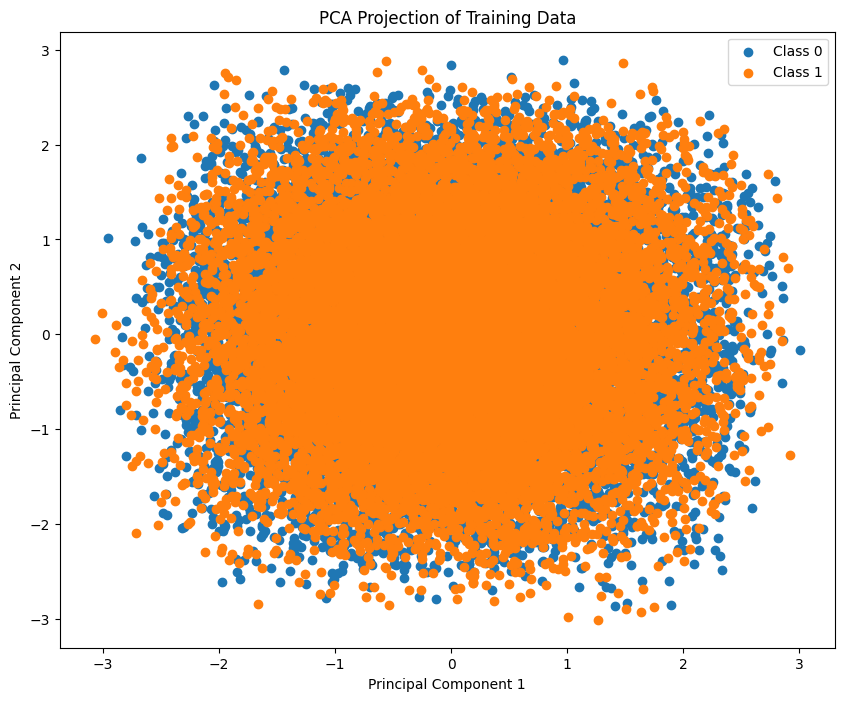

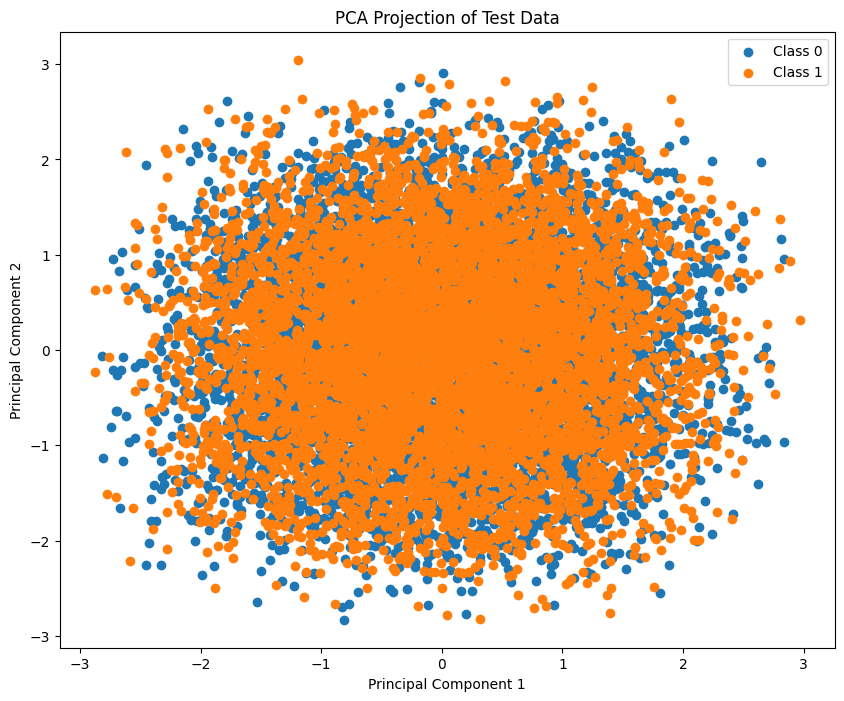

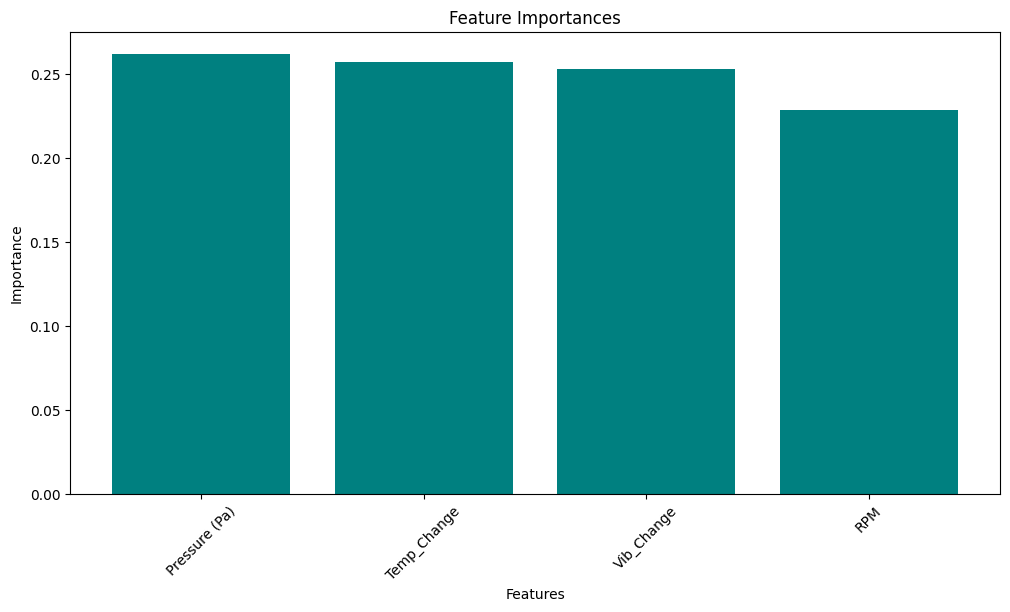

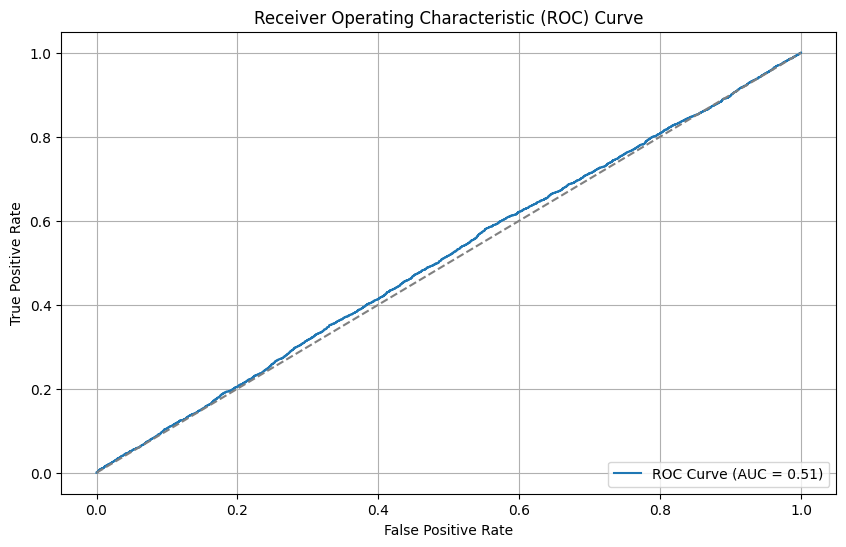

In [5]:
# Visualize the Training Results
import numpy as np

# Combine PCA results with labels for visualization
pca_results_train = pd.DataFrame(X_train_pca, columns=["PC1", "PC2"])
pca_results_train['Label'] = y_train_res.values

# Plot the training data in PCA space
plt.figure(figsize=(10, 8))
for label in np.unique(pca_results_train['Label']):
    subset = pca_results_train[pca_results_train['Label'] == label]
    plt.scatter(subset["PC1"], subset["PC2"], label=f'Class {label}')
plt.title("PCA Projection of Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Visualize the Test Results
pca_results_test = pd.DataFrame(X_test_pca, columns=["PC1", "PC2"])
pca_results_test['Label'] = y_test.values

plt.figure(figsize=(10, 8))
for label in np.unique(pca_results_test['Label']):
    subset = pca_results_test[pca_results_test['Label'] == label]
    plt.scatter(subset["PC1"], subset["PC2"], label=f'Class {label}')
plt.title("PCA Projection of Test Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Feature Importance Visualization
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": user_selected_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"], color="teal")
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

# Model Metrics
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [6]:
# Save the Model for Reuse
import pickle

# Save the best model to a file
model_filename = "best_model.pkl"
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)
print(f"Model saved to {model_filename}")

# Save the Scaler for Reuse
scaler_filename = "scaler.pkl"
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
print(f"Scaler saved to {scaler_filename}")

# Load the Model and Scaler for New Predictions
def load_model_and_predict(user_input):
    # Load the saved model
    with open(model_filename, 'rb') as model_file:
        loaded_model = pickle.load(model_file)

    # Load the saved scaler
    with open(scaler_filename, 'rb') as scaler_file:
        loaded_scaler = pickle.load(scaler_file)

    # Transform the user input using the loaded scaler
    user_input_transformed = loaded_scaler.transform([user_input])

    # Make predictions using the loaded model
    prediction = loaded_model.predict(user_input_transformed)
    return prediction[0]

# Test the Reuse Functionality
print("\n--- Test Model Reuse ---")
try:
    user_values = list(map(float, input("Enter values for selected features (comma-separated): ").split(',')))
    if len(user_values) != len(user_selected_features):
        raise ValueError("Input does not match the number of selected features!")
    predicted_label = load_model_and_predict(user_values)
    print(f"Prediction for input {user_values}: {predicted_label}")
except Exception as e:
    print(f"Error: {e}")

# Save Feature Importance Results
feature_importance_df.to_csv("feature_importance.csv", index=False)
print("Feature importance saved to 'feature_importance.csv'.")


Model saved to best_model.pkl
Scaler saved to scaler.pkl

--- Test Model Reuse ---
Enter values for selected features (comma-separated): 0.2,0.3,0.1,1
Prediction for input [0.2, 0.3, 0.1, 1.0]: 1
Feature importance saved to 'feature_importance.csv'.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
# Define or document the mapping
mapping = {0: "No Maintenance Required", 1: "Maintenance Required"}
print(f"Prediction for input {user_values}: {mapping[predicted_label]}")


Prediction for input [0.2, 0.3, 0.1, 1.0]: Maintenance Required
